# Задача 7. Пример бизнес задачи. 9 баллов.

Данное задание обсуждается на техническом собеседовании в разделе кейс-интервью. Предполагается решение этого задания после прохождения собеседования. Ознакомление с заданием позволит заранее подумать и сформулировать варианты решения, которые обсуждаются на собеседовании.

## Входные данные: ##
В файле train.csv (разделитель - «;») представлен набор данных о визитах клиентов на сервис. 
Пояснение признаков в train.csv:

    • АвтомобильМодель — Модель автомобиля
    • АвтомобильМодельБренд — Марка автомобиля
    • АвтомобильVIN — обезличенный VIN-номер автомобиля
    • Значение — Пробег автомобиля на дату визита (показания одометра)
    • АвтомобильГодВыпуска — Год выпуска автомобиля
    • Период — Дата визита
    • АвтомобильМодельМежсервисныйПробегТО — Пробег данной марки автомобиля между ТО
    • ТО — Метка, которая показывает, является ли данный визит ТО или нет (например ремонт)
В файле содержится около 100 тыс. записей, около 10 тыс. уникальных автомобилей.

https://www.kaggle.com/datasets/maxim9012/agat-test

In [160]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [161]:
df = pd.read_csv('train.csv', )

In [162]:
df

,Unnamed: 0,АвтомобильМодель,АвтомобильМодельБренд,АвтомобильVIN,Значение,АвтомобильГодВыпуска,Период,АвтомобильМодельМежсервисныйПробегТО,ТО
0,0,LADA Largus Caravan (7м),LADA,27837,29 644,01.01.2014 0:00:00,03.08.2015 0:00:00,15 000,Нет
1,1,LADA Largus Caravan (7м),LADA,27837,29 644,01.01.2014 0:00:00,06.08.2015 0:00:00,15 000,Да
2,2,LADA Largus Caravan (7м),LADA,27837,62 152,01.01.2014 0:00:00,28.04.2016 0:00:00,15 000,Нет
3,3,LADA Largus Caravan (7м),LADA,27837,104 743,01.01.2014 0:00:00,09.12.2016 0:00:00,15 000,Да
4,4,УАЗ Patriot 3163,УАЗ,28253,29 979,01.01.2016 0:00:00,27.01.2018 0:00:00,15 000,Да
...,...,...,...,...,...,...,...,...,...
109231,109231,Toyota Corolla X E140/E150,TOYOTA,10244,85 847,01.01.2011 0:00:00,12.04.2016 0:00:00,10 000,Нет
109232,109232,Toyota Corolla X E140/E150,TOYOTA,10244,89 316,01.01.2011 0:00:00,11.06.2016 0:00:00,10 000,Нет
109233,109233,Toyota Corolla X E140/E150,TOYOTA,10244,89 316,01.01.2011 0:00:00,12.06.2016 0:00:00,10 000,Нет
109234,109234,Hyundai ix35 I,Hyundai,15476,25 750,01.01.2014 0:00:00,29.07.2017 0:00:00,15 000,Да


In [163]:
from sklearn.preprocessing import LabelEncoder

In [164]:
le = LabelEncoder()
df['АвтомобильМодель'] = le.fit_transform(df['АвтомобильМодель'])
df['АвтомобильМодельБренд'] = le.fit_transform(df['АвтомобильМодельБренд'])
df['АвтомобильГодВыпуска'] = le.fit_transform(df['АвтомобильГодВыпуска'])
df['АвтомобильVIN'] = le.fit_transform(df['АвтомобильVIN'])
df['Значение'] = le.fit_transform(df['Значение'])
per = df['Период']
df['Период'] = le.fit_transform(df['Период'])
df['АвтомобильМодельМежсервисныйПробегТО'] = le.fit_transform(df['АвтомобильМодельМежсервисныйПробегТО'])
df['ТО'] = le.fit_transform(df['ТО'])

C:\Users\maxim\AppData\Local\Temp\ipykernel_16668\2307873558.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['ТО'], palette = [green, red])


<Axes: xlabel='ТО', ylabel='count'>

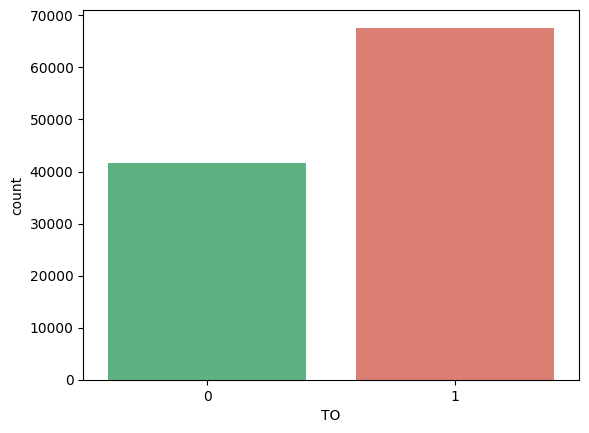

In [165]:
green = '#52BE80'
red = '#EC7063'
sns.countplot(x = df['ТО'], palette = [green, red])

In [166]:
y = df['ТО']
df = df.drop(columns=['ТО'])


In [167]:
df

,Unnamed: 0,АвтомобильМодель,АвтомобильМодельБренд,АвтомобильVIN,Значение,АвтомобильГодВыпуска,Период,АвтомобильМодельМежсервисныйПробегТО
0,0,169,10,6644,22627,15,342,1
1,1,169,10,6644,22627,15,751,1
2,2,169,10,6644,42151,15,3749,1
3,3,169,10,6644,894,15,1192,1
4,4,402,19,6729,22947,17,3576,1
...,...,...,...,...,...,...,...,...
109231,109231,305,17,3651,50457,12,1522,0
109232,109232,305,17,3651,51089,12,1400,0
109233,109233,305,17,3651,51089,12,1543,0
109234,109234,125,6,5257,20143,15,3915,1


In [168]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)

Shape of train (76465, 8)
Shape of Validation  (32771, 8)


In [146]:
rfc = RandomForestClassifier(criterion='entropy', n_estimators=700)

In [147]:
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=700)

In [148]:
y_predrfc = rfc.predict(X_test)

In [149]:
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_predrfc)))

Model accuracy score : 0.6530


In [184]:
test = pd.read_csv('test.csv')

In [185]:
test

,Unnamed: 0,АвтомобильМодель,АвтомобильМодельБренд,АвтомобильVIN,Значение,АвтомобильГодВыпуска,Период,АвтомобильМодельМежсервисныйПробегТО,ТО
0,0,Hyundai Solaris HCR,Hyundai,45459,45 986,01.01.2017 0:00:00,24.06.2018 0:00:00,15 000,Да
1,1,Hyundai Sonata VI,Hyundai,11029,40 193,01.01.2011 0:00:00,15.03.2015 0:00:00,15 000,Да
2,2,Hyundai Santa Fe II,Hyundai,11597,56 355,01.01.2012 0:00:00,11.09.2019 0:00:00,15 000,Да
3,3,Hyundai Elantra V,Hyundai,10664,179 260,01.01.2013 0:00:00,23.10.2018 0:00:00,15 000,Да
4,4,Hyundai Solaris Sedan,Hyundai,40022,45 120,01.01.2016 0:00:00,09.06.2018 0:00:00,15 000,Да
...,...,...,...,...,...,...,...,...,...
10473,10473,Toyota RAV 4 IV 5D,TOYOTA,8383,33 521,01.01.2015 0:00:00,17.10.2018 0:00:00,10 000,Да
10474,10474,Hyundai Solaris Sedan,Hyundai,39104,25 552,01.01.2014 0:00:00,18.11.2018 0:00:00,15 000,Да
10475,10475,Lexus NX 200T,LEXUS,5059,30 099,01.01.2016 0:00:00,01.04.2019 0:00:00,10 000,Да
10476,10476,Toyota Land Cruiser 200,TOYOTA,7698,189 650,01.01.2013 0:00:00,15.02.2019 0:00:00,10 000,Да


In [186]:
le = LabelEncoder()
test['АвтомобильМодель'] = le.fit_transform(test['АвтомобильМодель'])
test['АвтомобильМодельБренд'] = le.fit_transform(test['АвтомобильМодельБренд'])
test['АвтомобильГодВыпуска'] = le.fit_transform(test['АвтомобильГодВыпуска'])
test['АвтомобильVIN'] = le.fit_transform(test['АвтомобильVIN'])
test['Значение'] = le.fit_transform(test['Значение'])
test['Период'] = le.fit_transform(test['Период'])
test['АвтомобильМодельМежсервисныйПробегТО'] = le.fit_transform(test['АвтомобильМодельМежсервисныйПробегТО'])
test['ТО'] = le.fit_transform(test['ТО'])

In [187]:
test

,Unnamed: 0,АвтомобильМодель,АвтомобильМодельБренд,АвтомобильVIN,Значение,АвтомобильГодВыпуска,Период,АвтомобильМодельМежсервисныйПробегТО,ТО
0,0,104,6,10429,5356,18,1555,1,0
1,1,108,6,3823,4316,12,932,1,0
2,2,101,6,3963,6331,13,701,1,0
3,3,86,6,3720,1608,14,1515,1,0
4,4,106,6,9493,5132,17,551,1,0
...,...,...,...,...,...,...,...,...,...
10473,10473,332,17,2949,3554,16,1118,0,0
10474,10474,106,6,9097,2361,15,1189,1,0
10475,10475,207,11,1480,3027,17,16,0,0
10476,10476,322,17,2565,1713,14,930,0,0


In [188]:
y = test['ТО']
test = test.drop(columns=['ТО'])

In [189]:
X_train_test, X_test_test, y_train_test, y_test_test = train_test_split(test, y, test_size=0.3, random_state=42)

In [190]:
y_predrfc = rfc.predict(X_train_test)

In [191]:
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_train_test, y_predrfc)))

Model accuracy score : 0.3019


In [192]:
y_predrfc = rfc.predict(X_test_test)

In [193]:
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test_test, y_predrfc)))

Model accuracy score : 0.3025
